## Proceso para el video

### Importaciones

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Función para mostrar los frames

In [2]:
def imshow(title = "", image = None): # todo el metodo es para dar un formato a la imagen mostrada de(titulo, imagen)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))# Convierte la imagen de BGR a RGB, el formato de imagen que espera matplotlib.
    plt.title(title)#establece el titulo
    plt.show()#muestra la imagen en los graficos

### KERNEL

In [3]:
# Tamaño del kernel (asegúrate de que sea un número impar para que tenga un centro)
tamaño = 3

# Crear una matriz de ceros del tamaño especificado
kernel = np.zeros((tamaño, tamaño), dtype=np.uint8)

# variables, para Calcular el centro del kernel
centro_x, centro_y = tamaño // 2, tamaño // 2

# variable para Calcular el radio del círculo
radio = tamaño // 2

# Generar un círculo en el kernel
y, x = np.ogrid[-centro_x:tamaño - centro_x, -centro_y:tamaño - centro_y]
mascara = x**2 + y**2 <= radio**2
kernel[mascara] = 1

print(kernel)#imprimir el kernel

[[0 1 0]
 [1 1 1]
 [0 1 0]]


### Código para saber la cantidad de frames que tiene el video

In [4]:
video = cv2.VideoCapture('./imagenes y videos/video 1 de coches.mp4')# En este objeto se le asigna el video, el objeto se utilizara para leer los frames de uno a uno.

# Verifica si el video se abrió correctamente
if not video.isOpened():
    print("Error: No se pudo abrir el video.")
else:
    # Obtiene la cantidad de fotogramas (frames) en el video
    num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"El video tiene {num_frames} fotogramas.")

# Libera el objeto VideoCapture
video.release()

El video tiene 335 fotogramas.


### Mostrar frames recortados

In [ ]:
video = cv2.VideoCapture('./imagenes y videos/video 1 de coches.mp4')# En este objeto se le asigna el video, el objeto se utilizara para leer los frames de uno a uno.


cont = 1# variable para un contador que nos ayudara a contar el numero de frames.
while True:# Ciclo finito para la lectura de los frames de el video.

    # Lee un frame
    ret, frame = video.read()#ret es para verificar si la lectura fue exitosa, frame contiene el frame leido.
    
    imageOut = frame[150:250,300:700] #recortar imagen
    
    if not ret:#-|  Si no hay más frames, rompe el bucle
        break#---|
    
    if cont<36:#-|
        cont+=1#-|condicional para seccionar el uso de frames, segun las obsertvaciones, el contador sumara y seguira avanzando.
        continue#|
    
    # Muestra el frame con plt.imshow
    imshow(f"Frame {cont}", imageOut)# muestra segun la asignacion anterior la imagen la frase frame, seguido de el numero de frame para cada uno.
    plt.pause(0.03)  # Pausa por un corto período de tiempo antes de mostrar el próximo framee( en este caso 3 milisegundos)

    cont += 1# al pasar por aqui aumentara el contador de los frames con cada iteracion.
    if cont >= 65:# |en esta seccion el bucle hara break cuando la variable contador llegue hasta el digito que asignamos.
        break     # |Libera el objeto de captura de video una vez terminado el proceso

video.release()# Libera el objeto de captura de video un vez se termine el proceso.
plt.close('all')# Cierra todas las ventanas de pyplot(plt)

### Canales RGB del video recortado

In [ ]:
video = cv2.VideoCapture('./imagenes y videos/video 1 de coches.mp4')
cont = 1

while True:
    ret, frame = video.read()

    if not ret:
        break#

    if cont<36:
     cont+=1
     continue#

    # Convierte el frame a RGB (OpenCV usa BGR por defecto para que pueda hacer la lectura matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    imageOut = frame_rgb[150:250,300:700]
   
    plt.pause(0.03)

    imagen_R = imageOut.copy()#|
    imagen_G = imageOut.copy()#|se crean copias de nuestr0 frame (frame_rgb) para trabajar con los canales:R (rojo), G (verde) y B (azul).
    imagen_B = imageOut.copy()#|

    # Aislar el canal R
    imagen_R[:, :, 1] = 0  # G  |
    imagen_R[:, :, 2] = 0  # B  |Separa el canal rojo (R) en "img_R" al establecer a cero los valores de los canales verde (G) y azul (B) en toda la imagen.

    # Aislar el canal G
    imagen_G[:, :, 0] = 0  # R  |
    imagen_G[:, :, 2] = 0  # B  |Separa el canal verde (G) en "img_G" al establecer a cero los valores de los canales rojo (R) y azul (B) en toda la imagen.

    # Aislar el canal B
    imagen_B[:, :, 0] = 0  # R  |
    imagen_B[:, :, 1] = 0  # G  |Separa el canal azul (B) en "img_B" al establecer a cero los valores de los canales rojo (R) y verde (G) en toda la imagen.

   
    # Visualizar las imágenes
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))#Se Crea una figura con matplotlib con cuatro subtramas (cuatro imágenes en una fila) y establece el tamaño de la figura con figsize.

    ax[0].imshow(imageOut)               #|
    ax[0].set_title("Frame " + str(cont))#|Configura la primera subtrama para mostrar el frame recortado (imageOut), se coloca un título que incluye el número de frame y elimina los ejes (axis).
    ax[0].axis('off')                    #|

    ax[1].imshow(imagen_R)          #|
    ax[1].set_title("Canal Rojo")#|Configura la segunda subtrama para mostrar la imagen "img_R"(frame en canal rojo) y elimina los ejes (axis).
    ax[1].axis('off')            #| 

    ax[2].imshow(imagen_G)           #|
    ax[2].set_title("Canal Verde")#|Configura la tercera subtrama para mostrar la imagen "img_G"(frame en canal verde) y elimina los ejes (axis).
    ax[2].axis('off')             #|

    ax[3].imshow(imagen_B)          #|
    ax[3].set_title("Canal Azul")#|Configura la cuarta subtrama para mostrar la imagen "img_B"(frame en canal azul) y elimina los ejes (axis).
    ax[3].axis('off')            #|

    plt.show()#muestra la figura con las 4 subtramas que son las establecidas en este caso.

    cont += 1
    if cont >= 65:
        break 


video.release()
plt.close('all')

### Histograma del canal verde del video recortado

In [ ]:
video = cv2.VideoCapture('./imagenes y videos/video 1 de coches.mp4')

cont = 1
while True:

    ret, frame = video.read()
  
    if not ret:
        break
    
    if cont<36:
     cont+=1
     continue#
   
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    imageOut = frame_rgb[150:250,300:700]
    
    plt.pause(0.03)

    #Se tomó el frame de color verde para porcesarla
    imagen_G = imageOut.copy()
    imagen_G[:, :, 0] = 0 
    imagen_G[:, :, 2] = 0

    frame_gris = cv2.cvtColor(imagen_G, cv2.COLOR_BGR2GRAY)# la imagen en la escala verde(img_G) se pasa a escala de grises.

    # Calcular el histograma
    histogrma = cv2.calcHist([frame_gris], [0], None, [256], [0, 256])# En la variable hist, se almacena el calculo del histograma (intensidad de pixeles) en escala de grises del frame actual(frame_gris = img_G que es la imagen del canal verde) utilizando la propiedad de "calcHist" de cv2)

    # Visualizar la imagen y su histograma
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))#Se Crea una figura con matplotlib con dos subtramas en este caso(dos imágenes en una fila) y establece el tamaño de la figura con "figsize".

    # Mostrar la imagen en escala de grises
    ax[0].imshow(frame_gris, cmap='gray')                #|
    ax[0].set_title("Frame " + str(cont) + " en el canal verde y en gris")#|Configura la primera subtrama para mostrar la imagen(frame_gris = img_G: que es la imagen del canal verde) en escala de grises, se coloca un título que incluye el número de frame, y elimina los ejes (axis)
    ax[0].axis('off')                                   #|

    # Mostrar el histograma
    ax[1].plot(histogrma, color='black')                #|
    ax[1].set_title("Histograma del frame " + str(cont))#|
    ax[1].set_xlabel("Intensidad de Pixel")             #|Configura la segunda subtrama para mostrar el histograma en escala de grises, se coloca un título que incluye el número de frame, etiquetas para los ejes y habilita las lineas de los ejes.
    ax[1].set_ylabel("Cantidad de Píxeles")             #|
    ax[1].grid(True)                                    #|


    plt.tight_layout()#| Muestra la figura con las 2 subtramas.
    plt.show()        #|

    cont += 1
    if cont >= 65:
        break

video.release()
plt.close('all')

### Binarización del canal verde del video recortado

In [ ]:
video = cv2.VideoCapture('./imagenes y videos/video 1 de coches.mp4')

cont = 1
while True:
    
    ret, frame = video.read() 
    
    if not ret:
        break
    
    if cont<36:
     cont+=1
     continue

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    imageOut = frame_rgb[150:250,300:700]
    
    plt.pause(0.03)

    imagen_G = imageOut.copy()
    imagen_G[:, :, 0] = 0
    imagen_G[:, :, 2] = 0

    frame_gris = cv2.cvtColor(imagen_G, cv2.COLOR_BGR2GRAY)

    umbral = 55  # Esta variable tendra el valor del umbral que en este caso es 45, los píxeles con intensidades superiores al umbral se volverán blancos, y los píxeles con intensidades iguales o inferiores al umbral se volverán negros.

    # Binarizar la imagen
    _, frame_binarizado = cv2.threshold(frame_gris, umbral, 255, cv2.THRESH_BINARY)# En la variable frame binarizada, se almacena el calculo de la binarizacion en escala de grises del frame actual(frame_gris  = img_G:imagen del  canal verde) utilizando la propiedad de "threshold" de cv2)

    # Visualizar la imagen original y la imagen binarizada
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))#Se Crea una figura con matplotlib con dos subtramas en este caso(dos imágenes en una fila) y establece el tamaño de la figura con "figsize".

    # Mostrar la imagen en escala de grises
    ax[0].imshow(frame_gris , cmap='gray')                      #|
    ax[0].set_title("Frame " + str(cont) + " en el canal verde")#|Configura la primera subtrama para mostrar la imagen(frame_gris  = img_G:que es la imagen del canal verde) en escala de grises, se coloca un título que incluye el número de frame, y elimina los ejes (axis)
    ax[0].axis('off')                                           #|

    # Mostrar la imagen binarizada
    ax[1].imshow(frame_binarizado, cmap='gray')                               #|
    ax[1].set_title(f"Frame {cont} binarizado (canal verde) (Umbral = {umbral})")#|Configura la segunda subtrama para mostrar la imagen "frane_binarizada"(imagen binarizada de frame rgb), establece un título que incluye el número de frame y elimina los ejes (axis).
    ax[1].axis('off')                                                         #|

    plt.tight_layout()#| Muestra la figura con las 2 subtramas
    plt.show()        #|

    cont += 1
    if cont >= 65:
        break     

video.release()
plt.close('all')

### Comparativa de erosión y dilatación, uso del operador NOT y uso del filtro Gaussiano

In [ ]:
video = cv2.VideoCapture('./imagenes y videos/video 1 de coches.mp4')

cont = 1
while True:
    
    ret, frame = video.read()
   
    if not ret:
        break
    
    if cont<36:
     cont+=1
     continue

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    imageOut = frame_rgb[150:250,300:700]
    
    plt.pause(0.03)

    imagen_G = imageOut.copy()
    imagen_G[:, :, 0] = 0  
    imagen_G[:, :, 2] = 0

    frame_gris  = cv2.cvtColor(imagen_G, cv2.COLOR_BGR2GRAY)
    
    umbral = 55 

    _, frame_binarizado = cv2.threshold(frame_gris , umbral, 255, cv2.THRESH_BINARY)

    gaussiano = cv2.GaussianBlur(frame_binarizado, (21, 21), 0)#Se puso el filtro Gaussiano de 21x21 para quitar pequeños "ruidos" de fondo

    frame_b_invertido = cv2.bitwise_not(gaussiano)

    frame_erosionada = cv2.erode(frame_b_invertido, kernel, iterations=3)#En la variable frame_erosionada, se almacena el calculo de la erosion mediante la propiedad "erode" de OpenCv(cv2), haciendo uso de la variable que contiene la binarizacion invertida
    #                                                                              "frame_b_invertido" y el kernel de cicrculo que se establecio en los procesos inciales, por ultimo se pone las iteraciones que hara el proceso usado.

    frame_dilatada = cv2.dilate(frame_b_invertido, kernel, iterations=7)#En la variable frame_dilatada, se almacena el calculo de la dilatacion mediante la propiedad "dilate" de OpenCv(cv2), haciendo uso de la variable que contiene la binarizacion invertida
                                                                        #"frame_b_invertido" y el kernel de cicrculo que se establecio en los procesos inciales, por ultimo se pone las iteraciones que hara el proceso usado.

    fig, ax = plt.subplots(1, 3, figsize=(12, 5))#Se Crea una figura con matplotlib con dos subtramas en este caso(dos imágenes en una fila) y establece el tamaño de la figura con "figsize".

    # Mostrar el frame_b_invertido
    ax[0].imshow(frame_b_invertido, cmap='gray')                                  #|
    ax[0].set_title("Frame  " + str(cont) + " binarizado invertido (canal verde)")#|Configura la primera subtrama para mostrar la imagen(frame_b_invertida = frame binarizada:que es la imagen binarizada del canal verde) en escala de grises, se coloca un título que incluye el número de frame, y elimina los ejes (axis)
    ax[0].axis('off')                                                             #|

    # Mostrar el frame_dilatada
    ax[1].imshow(frame_dilatada, cmap='gray')              #|
    ax[1].set_title(f"Frame {cont} dilatado (canal verde)")#|Configura la segunda subtrama para mostrar la imagen "imagen_dilatada"(frame_b_invertido) y elimina los ejes (axis).
    ax[1].axis('off')                                      #|

    # Mostrar el frame_erosionada
    ax[2].imshow(frame_erosionada, cmap='gray')              #|
    ax[2].set_title(f"Frame {cont} erosionado (canal verde)")#|Configura la tercera subtrama para mostrar la imagen "imagen_erosionada" y elimina los ejes (axis).
    ax[2].axis('off')                                        #|

    plt.tight_layout()#| Muestra la figura con las 2 subtramas
    plt.show()        #|

    cont += 1
    if cont >= 65:
        break  

video.release()
plt.close('all')

### El conteo de coches a partir de una línea colocada en el video y gráfica de barras

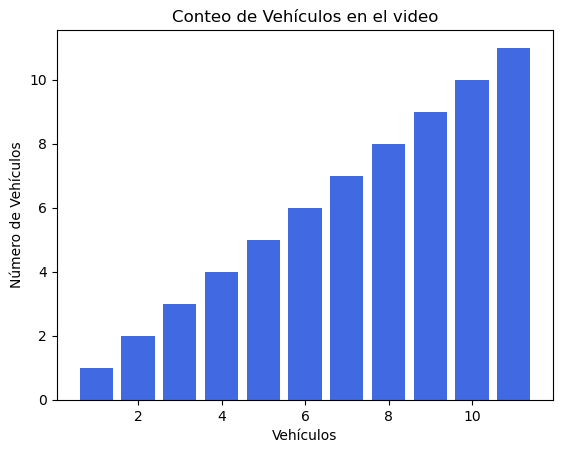

Total de Vehículos Contados: 11


In [5]:
video = cv2.VideoCapture('./imagenes y videos/video 1 de coches.mp4')

#Se inicializa los arreglos
etiquetas_numeros = []
vehiculos_totales = []

# Inicializar el contador de vehículos
vehicle_count = 0

cont = 1
while True:
  
    ret, frame = video.read()
    
    if not ret:
        break#  
    
    if cont<0:
     cont+=1
     continue#

    imageOut = frame[150:250,300:700]
    
    plt.pause(0.03)

    imagen_G = imageOut.copy()

    imagen_G[:, :, 0] = 0  
    imagen_G[:, :, 2] = 0 

    frame_gris = cv2.cvtColor(imagen_G, cv2.COLOR_BGR2GRAY)

    umbral = 55 

    _, frame_binarizado = cv2.threshold(frame_gris, umbral, 255, cv2.THRESH_BINARY)

    gaussiano = cv2.GaussianBlur(frame_binarizado, (21, 21), 0)

    frame_b_invertido = cv2.bitwise_not(gaussiano)

    frame_dilatada = cv2.dilate(frame_b_invertido, kernel, iterations=7)

    cv2.line(imageOut,(0,70),(400,70),(255,0,0),2)#Se crea una linea en la imagen recortada

    # Encontrar contornos en el cuadro actual
    contours, _ = cv2.findContours(frame_dilatada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Contar vehículos en el cuadro actual
    for contorno in contours:
        if cv2.contourArea(contorno) > 6200:  # Ajusta este valor según tus necesidades
            # Dibuja un rectángulo alrededor del vehículo detectado
            x, y, w, h = cv2.boundingRect(contorno)
            cv2.rectangle(imageOut, (x, y), (x + w, y + h), (0, 255, 0), 2)
            if  (y + h) > 60 and (y + h) < 80:  # Si la parte inferior del vehículo cruza la línea
                vehicle_count += 1 
                etiquetas_numeros.append(vehicle_count)#almacenar en el arreglo "etiquetas_numeros" la variable "vehicle_count"
                vehiculos_totales.append(vehicle_count)#almacenar en el arreglo "vehiculos_totales" la variable "vehicle_count"


    # Muestra el cuadro actual con los vehículos contados en el video
    cv2.imshow('Video con Vehículos Contados', frame)

     # Presiona 'q' para salir del bucle
    if cv2.waitKey(1) & 0xFF == ord('a'):
        break

    cont += 1   
    if cont >= 334:
        break     


video.release()

# Cierra la captura de video y la ventana
cv2.destroyAllWindows()

#Mostrar el número de vehículos por medio de una gráfica de barras
plt.bar(etiquetas_numeros, vehiculos_totales, color='royalblue')
plt.xlabel('Vehículos')
plt.ylabel('Número de Vehículos')
plt.title('Conteo de Vehículos en el video')
plt.show()

# Muestra el total de vehículos contados
print(f'Total de Vehículos Contados: {vehicle_count}')

### Uso de centroides en el video

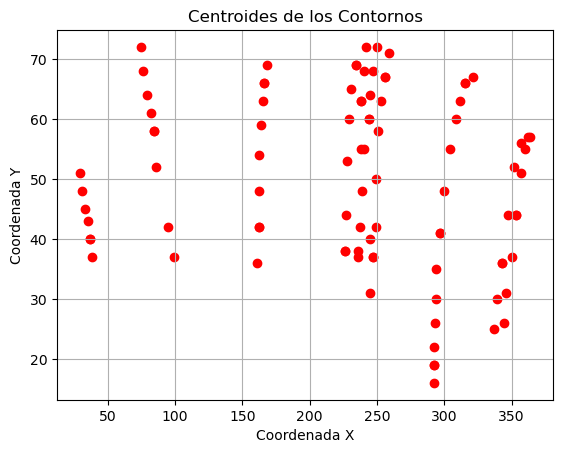

In [9]:
video = cv2.VideoCapture('./imagenes y videos/video 1 de coches.mp4')

#Inicializar arreglos
cent_x = []
cent_y = []


vehicle_count = 0

cont = 1
while True:
    
    ret, frame = video.read()
    
    if not ret:
        break#  
    
    if cont<0:
     cont+=1
     continue

    imageOut = frame[150:250,300:700]
    
    plt.pause(0.03)
    
    imagen_G = imageOut.copy()
   
    imagen_G[:, :, 0] = 0  
    imagen_G[:, :, 2] = 0 

    frame_gris = cv2.cvtColor(imagen_G, cv2.COLOR_BGR2GRAY)

    umbral = 55
   
    _, frame_binarizado = cv2.threshold(frame_gris, umbral, 255, cv2.THRESH_BINARY)

    gaussiano = cv2.GaussianBlur(frame_binarizado, (9, 9), 0)#Se cambiaron los valores del Gaussiano al 9x9 para ubicar los centroides en los vehículos

    frame_b_invertido = cv2.bitwise_not(gaussiano)

    frame_dilatada = cv2.dilate(frame_b_invertido, kernel, iterations=7)#En la variable imagen_dilatada, se almacena el calculo de la dilatacion mediante la propiedad "dilate" de OpenCv(cv2), haciendo uso de la variable que contiene la binarizacion invertida

    cv2.line(imageOut,(0,70),(400,70),(255,0,0),2) 

    # Encontrar contornos en el cuadro actual
    contours, _ = cv2.findContours(frame_dilatada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Contar vehículos en el cuadro actual
    for contorno in contours:
        if cv2.contourArea(contorno) > 6200:  # Ajusta este valor según tus necesidades
            # Dibuja un rectángulo alrededor del vehículo detectado
            x, y, w, h = cv2.boundingRect(contorno)
            cv2.rectangle(imageOut, (x, y), (x + w, y + h), (0, 255, 0), 2)


    # Calcular y dibujar los centroides de los contornos
    for contorno in contours:
        if cv2.contourArea(contorno) >=5300: # Ajusta este valor según tus necesidades
            momentos = cv2.moments(contorno)
            if momentos["m00"] != 0:
                # Dibuja circulos en los vehículos
                centroide_x = int(momentos["m10"] / momentos["m00"])
                centroide_y = int(momentos["m01"] / momentos["m00"])
                cv2.circle(imageOut, (centroide_x, centroide_y), 5, (0, 0, 255), -1)
                cent_x.append(centroide_x)#se almacena "centroide_x" en el arreglo cent_x
                cent_y.append(centroide_y)#se almacena "centroide_y" en el arreglo cent_y
    

    cv2.imshow('Video con Vehículos Contados', frame)     

    
    if cv2.waitKey(1) & 0xFF == ord('a'):
        break


    cont += 1
    if cont >= 334:
        break     


video.release()
cv2.destroyAllWindows()

# Crear una gráfica para mostrar los centroides
plt.scatter(cent_x, cent_y, c='r', marker='o', label='Centroides')
plt.title('Centroides de los Contornos')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Mostrar la gráfica
plt.grid(True)
plt.show()